# Goal: Create A Green Pigment Expressing E. coli

I have a collection of colors for agar art, but no good green (apart from GFP but that requires UV/blue light to shine).


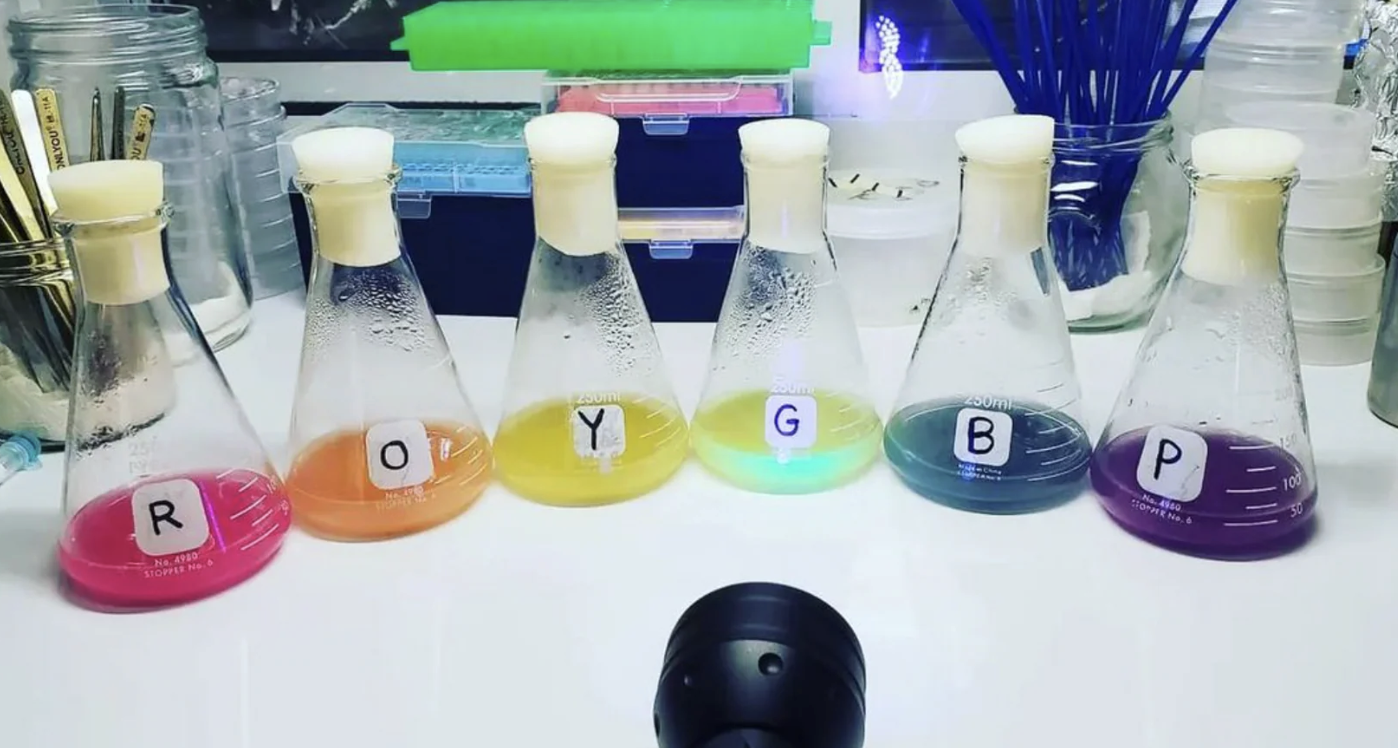


I want to design a plasmid that fills this gap. Current plan:

- Get a kit like the Carolina 'glow in the dark' transformation kit. (It uses amp as the selection)
- Do a run with that as practice
- Store a few stabs of their ecoli for later
- Order a plasmid that makes a protein that is basically aeBlue+fwyellow plus a linker. est $180 via GenScript FLASH Gene or maybe look at Twist Bioscience Clonal Genes.
- Make my own plates with kanamycin as selector
- Insert my plasmid into ecoli and hopefully get green!

I'm not satisfied with the look of aeCP597 or cjBlue, I want more of a true green. But also the main point is to contribute something a little novel :) A fellow nerd Justin has a "home made true blue protein called “electric blue”. Electric blue is a fusion of 2 fluorescent/chromoproteins: amilCP and Electra2. The former contributes a deep blue purple shade in white light, while the former contributes its ultramarine fluorescent glow under UV." 

## Getting the linker

In [ ]:
import httpx
eb = httpx.get('https://raw.githubusercontent.com/thethoughtemporium/Whose-gene-is-it-anyway/refs/heads/master/Thought%20Emporium%20Plasmids/TE%20electricblue%20pet9a%20prok1.gb').text
print(eb[1700:2000])

LLGNNFMALKLEGGGHYLCEFKTTYKAKKPVKMPGYHYVDRKLDVTNHNKDYTSVEQCEISIARKPVVA**"
     misc_feature    1361..1396
                     /label="linker"
                     /ApEinfo_revcolor="#ffef86"
                     /ApEinfo_fwdcolor="#ffef86"
     misc_feature    1397..2065
                     /label=


In [ ]:
# Extract the linker sequence from the full GenBank text
from Bio import SeqIO
from io import StringIO

record = SeqIO.read(StringIO(eb), "genbank")
linker_seq = record.seq[1360:1396]  # -1 for 0-based indexing
print(f"Linker DNA: {linker_seq}")
print(f"Linker amino acids: {linker_seq.translate()}")

Linker DNA: GGAGGATCTGGTGCTGGATCTGGTGGTTCAGGAGGC
Linker amino acids: GGSGAGSGGSGG


## Prepping DNA seqs for the protein

We have both AA seqs. For aeBlue we grab a gene from GenBank, for fwYellow we back-translate with greedy 'use the most common codon for this AA in ecoli' method.

In [ ]:
fwyellow = "MTALTEGAKL FEKEIPYITE LEGDVEGMKF IIKGEGTGDA SVGKVDAQFI CTTGDVPVPW STLVTTLTYG AQCFAKYPRH IADFFKSCMP EGYVQERTIT FEGDGVFKTR AEVTFENGSV YNRVKLNGQG FKKDGHVLGK NLEFNFTPHC LYIWGDQANH GLKSAFKIMH EITGSKEDFI VADHTQMNTP IGGGPVHVPE YHHITYHVTL SKDVTDHRDH LNIVEVIKAV DLETYR" # from https://www.fpbase.org/protein/fwyellow/
aeblue = "MASLVKKDMC IKMTMEGTVN GHHFKCVGEG EGKPFEGTQV EKIRITEGGP LPFAYDILAP CCMYGSKTFI KHVSGIPDYF KESFPEGFTW ERTQIFEDGG YLTIHQDTSL QGNNFIFKVN VIGANFPANG PVMQKKTAGW EPCVEMLYPR DGVLCGQSLM ALKCTDGNHL TSHLRTTYRS RKPSNAVNMP EFHFGDHRIE ILKAEQGKFY EQYESAVARY CEAAPSKLGH H" # from https://www.fpbase.org/protein/aeblue/ GenBank: DQ159069

In [ ]:
print(fwyellow.replace(" ", ""))

MTALTEGAKLFEKEIPYITELEGDVEGMKFIIKGEGTGDASVGKVDAQFICTTGDVPVPWSTLVTTLTYGAQCFAKYPRHIADFFKSCMPEGYVQERTITFEGDGVFKTRAEVTFENGSVYNRVKLNGQGFKKDGHVLGKNLEFNFTPHCLYIWGDQANHGLKSAFKIMHEITGSKEDFIVADHTQMNTPIGGGPVHVPEYHHITYHVTLSKDVTDHRDHLNIVEVIKAVDLETYR


In [ ]:
print(aeblue.replace(" ", ""))

MASLVKKDMCIKMTMEGTVNGHHFKCVGEGEGKPFEGTQVEKIRITEGGPLPFAYDILAPCCMYGSKTFIKHVSGIPDYFKESFPEGFTWERTQIFEDGGYLTIHQDTSLQGNNFIFKVNVIGANFPANGPVMQKKTAGWEPCVEMLYPRDGVLCGQSLMALKCTDGNHLTSHLRTTYRSRKPSNAVNMPEFHFGDHRIEILKAEQGKFYEQYESAVARYCEAAPSKLGHH


In [ ]:
from Bio import Entrez, SeqIO
Entrez.email = "youremail@gmail.com" # <<< Add yours here, I ran it with mine!
handle = Entrez.efetch(db="nucleotide", id="DQ159069", rettype="gb", retmode="text")
aeblue_record = SeqIO.read(handle, "genbank")
aeblue_record

SeqRecord(seq=Seq('ACTTTGACCCAGGTTCCTGCAGAAGAACAGTCAACATTTACAAGACAAAATCTG...AAT'), id='DQ159069.1', name='DQ159069', description='Actinia equina blue chromoprotein aeCP597 mRNA, complete cds', dbxrefs=[])

In [ ]:
# Remove spaces from your fwyellow sequence first
fwyellow_clean = fwyellow.replace(" ", "")

In [ ]:
# !pip install python-codon-tables

In [ ]:
from python_codon_tables import get_codons_table
ecoli_table = get_codons_table('e_coli')
# ecoli_table

In [ ]:
def back_translate(aa_seq, codon_table):
    return ''.join([max(codon_table[aa].items(), key=lambda x: x[1])[0] for aa in aa_seq])

fwyellow_dna = back_translate(fwyellow_clean, ecoli_table)
fwyellow_dna

'ATGACCGCGCTGACCGAAGGCGCGAAACTGTTTGAAAAAGAAATTCCGTATATTACCGAACTGGAAGGCGATGTGGAAGGCATGAAATTTATTATTAAAGGCGAAGGCACCGGCGATGCGAGCGTGGGCAAAGTGGATGCGCAGTTTATTTGCACCACCGGCGATGTGCCGGTGCCGTGGAGCACCCTGGTGACCACCCTGACCTATGGCGCGCAGTGCTTTGCGAAATATCCGCGCCATATTGCGGATTTTTTTAAAAGCTGCATGCCGGAAGGCTATGTGCAGGAACGCACCATTACCTTTGAAGGCGATGGCGTGTTTAAAACCCGCGCGGAAGTGACCTTTGAAAACGGCAGCGTGTATAACCGCGTGAAACTGAACGGCCAGGGCTTTAAAAAAGATGGCCATGTGCTGGGCAAAAACCTGGAATTTAACTTTACCCCGCATTGCCTGTATATTTGGGGCGATCAGGCGAACCATGGCCTGAAAAGCGCGTTTAAAATTATGCATGAAATTACCGGCAGCAAAGAAGATTTTATTGTGGCGGATCATACCCAGATGAACACCCCGATTGGCGGCGGCCCGGTGCATGTGCCGGAATATCATCATATTACCTATCATGTGACCCTGAGCAAAGATGTGACCGATCATCGCGATCATCTGAACATTGTGGAAGTGATTAAAGCGGTGGATCTGGAAACCTATCGC'

In [ ]:
aeblue_dna = str([f for f in aeblue_record.features if f.type == 'CDS'][0].extract(aeblue_record.seq))
linker_dna = str(linker_seq)
fusion_dna = aeblue_dna + linker_dna + fwyellow_dna
len(fusion_dna)

1440

**Note**: We've grabbed the wild type aeBlue, which *does* express in ecoli. There are also optimized sequences available for ecoli but I'm going to try this for now. For fwyellow, I've done a somewhat naive back-translation from the seq of the protein using the most common ecoli codon for each AA.

In [ ]:
print(aeblue_dna)

ATGGCTTCATTGGTTAAGAAGGATATGTGCATCAAGATGACCATGGAAGGGACAGTAAATGGTCACCATTTCAAGTGTGTAGGAGAAGGAGAAGGCAAGCCATTTGAAGGTACCCAGGTGGAAAAGATAAGAATCACTGAAGGTGGTCCCTTGCCATTTGCGTACGATATTTTGGCACCTTGTTGCATGTATGGAAGTAAGACCTTCATCAAGCATGTCTCAGGGATTCCAGATTACTTCAAGGAGTCTTTTCCTGAAGGCTTCACTTGGGAAAGAACCCAAATCTTCGAGGATGGAGGCTATCTCACCATTCACCAGGACACGAGCTTGCAGGGAAATAACTTCATTTTCAAGGTTAATGTCATCGGTGCCAACTTCCCTGCCAATGGTCCCGTGATGCAGAAGAAAACAGCAGGATGGGAACCATGCGTAGAGATGCTTTATCCACGTGACGGTGTCCTGTGTGGGCAGTCCTTGATGGCCCTGAAATGCACTGATGGTAACCATTTGACGAGCCATCTGCGAACTACCTACAGGTCCAGAAAGCCATCCAATGCAGTTAATATGCCAGAATTTCATTTTGGAGACCATCGCATTGAGATACTAAAGGCAGAACAAGGCAAGTTTTATGAACAGTACGAATCAGCGGTGGCCAGGTACTGTGAGGCGGCACCATCAAAGCTTGGACATCACTAA


In [ ]:
print(linker_dna)

GGAGGATCTGGTGCTGGATCTGGTGGTTCAGGAGGC


In [ ]:
print(fwyellow_dna)

ATGACCGCGCTGACCGAAGGCGCGAAACTGTTTGAAAAAGAAATTCCGTATATTACCGAACTGGAAGGCGATGTGGAAGGCATGAAATTTATTATTAAAGGCGAAGGCACCGGCGATGCGAGCGTGGGCAAAGTGGATGCGCAGTTTATTTGCACCACCGGCGATGTGCCGGTGCCGTGGAGCACCCTGGTGACCACCCTGACCTATGGCGCGCAGTGCTTTGCGAAATATCCGCGCCATATTGCGGATTTTTTTAAAAGCTGCATGCCGGAAGGCTATGTGCAGGAACGCACCATTACCTTTGAAGGCGATGGCGTGTTTAAAACCCGCGCGGAAGTGACCTTTGAAAACGGCAGCGTGTATAACCGCGTGAAACTGAACGGCCAGGGCTTTAAAAAAGATGGCCATGTGCTGGGCAAAAACCTGGAATTTAACTTTACCCCGCATTGCCTGTATATTTGGGGCGATCAGGCGAACCATGGCCTGAAAAGCGCGTTTAAAATTATGCATGAAATTACCGGCAGCAAAGAAGATTTTATTGTGGCGGATCATACCCAGATGAACACCCCGATTGGCGGCGGCCCGGTGCATGTGCCGGAATATCATCATATTACCTATCATGTGACCCTGAGCAAAGATGTGACCGATCATCGCGATCATCTGAACATTGTGGAAGTGATTAAAGCGGTGGATCTGGAAACCTATCGC


In [ ]:
len(aeblue_dna), len(linker_dna), len(fwyellow_dna)

(696, 36, 708)

In [ ]:
# Print the combined AA sequence, leaving out the stop from aeBlue and adding to fwYellow:
fusion_aa = aeblue.replace(" ", "")[:-1] + linker_seq.translate().strip("*") + fwyellow.replace(" ", "")
print(f"Fusion protein AA sequence: {fusion_aa}")
print(f"Length: {len(fusion_aa)} amino acids")

Fusion protein AA sequence: MASLVKKDMCIKMTMEGTVNGHHFKCVGEGEGKPFEGTQVEKIRITEGGPLPFAYDILAPCCMYGSKTFIKHVSGIPDYFKESFPEGFTWERTQIFEDGGYLTIHQDTSLQGNNFIFKVNVIGANFPANGPVMQKKTAGWEPCVEMLYPRDGVLCGQSLMALKCTDGNHLTSHLRTTYRSRKPSNAVNMPEFHFGDHRIEILKAEQGKFYEQYESAVARYCEAAPSKLGHGGSGAGSGGSGGMTALTEGAKLFEKEIPYITELEGDVEGMKFIIKGEGTGDASVGKVDAQFICTTGDVPVPWSTLVTTLTYGAQCFAKYPRHIADFFKSCMPEGYVQERTITFEGDGVFKTRAEVTFENGSVYNRVKLNGQGFKKDGHVLGKNLEFNFTPHCLYIWGDQANHGLKSAFKIMHEITGSKEDFIVADHTQMNTPIGGGPVHVPEYHHITYHVTLSKDVTDHRDHLNIVEVIKAVDLETYR
Length: 478 amino acids


Alphafold folding of this:

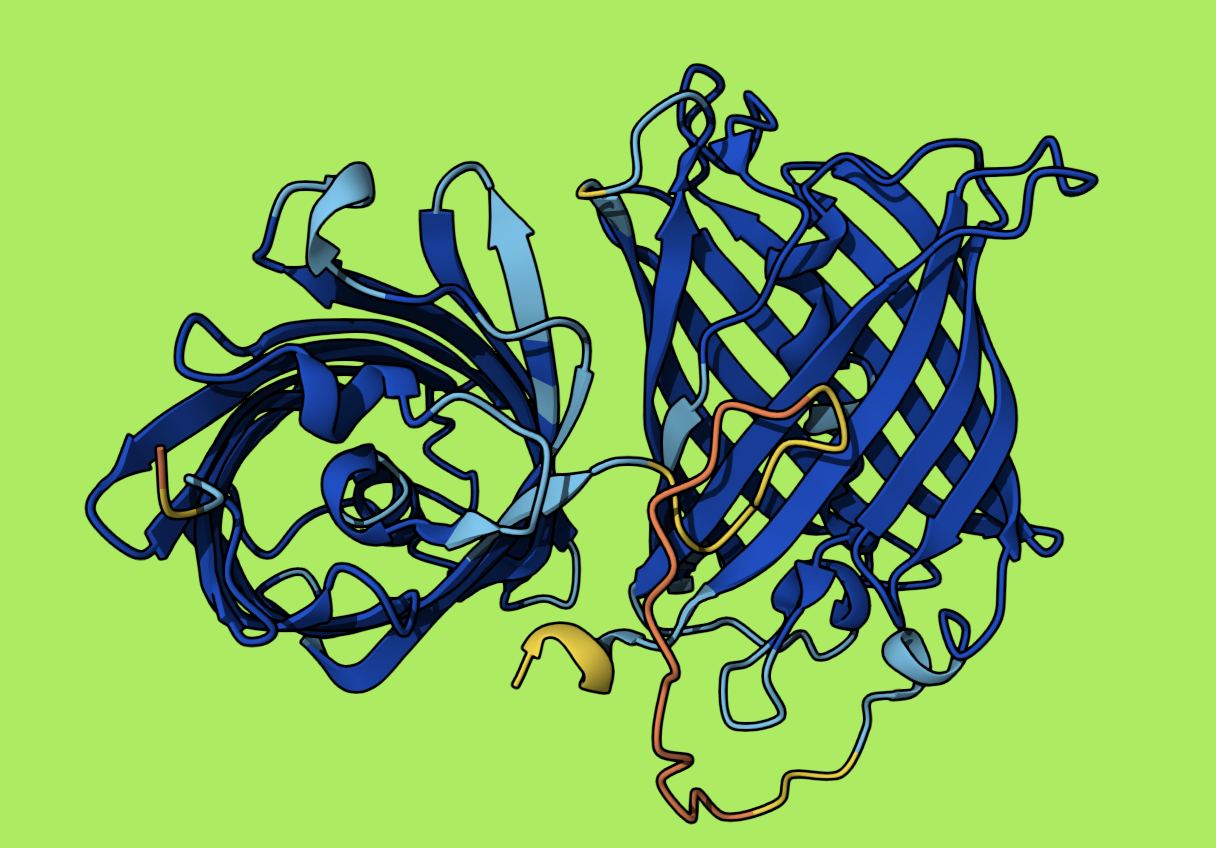


# Cleanup + Additions

Tidying up the core DNA, adding RBS, promoter, terminator, and other bits (drawing on one of Seb's ones)

We currently have a stop on the end of aeBlue ('TAA') and no stop on the end of fwYellow:

In [ ]:
aeblue_dna[-6:], fwyellow_dna[-6:]

('CACTAA', 'TATCGC')

So we need to fix that or switch the order (I'm fixing for fun). 

Then I'm going to borrow some bits from Seb's GFP one:


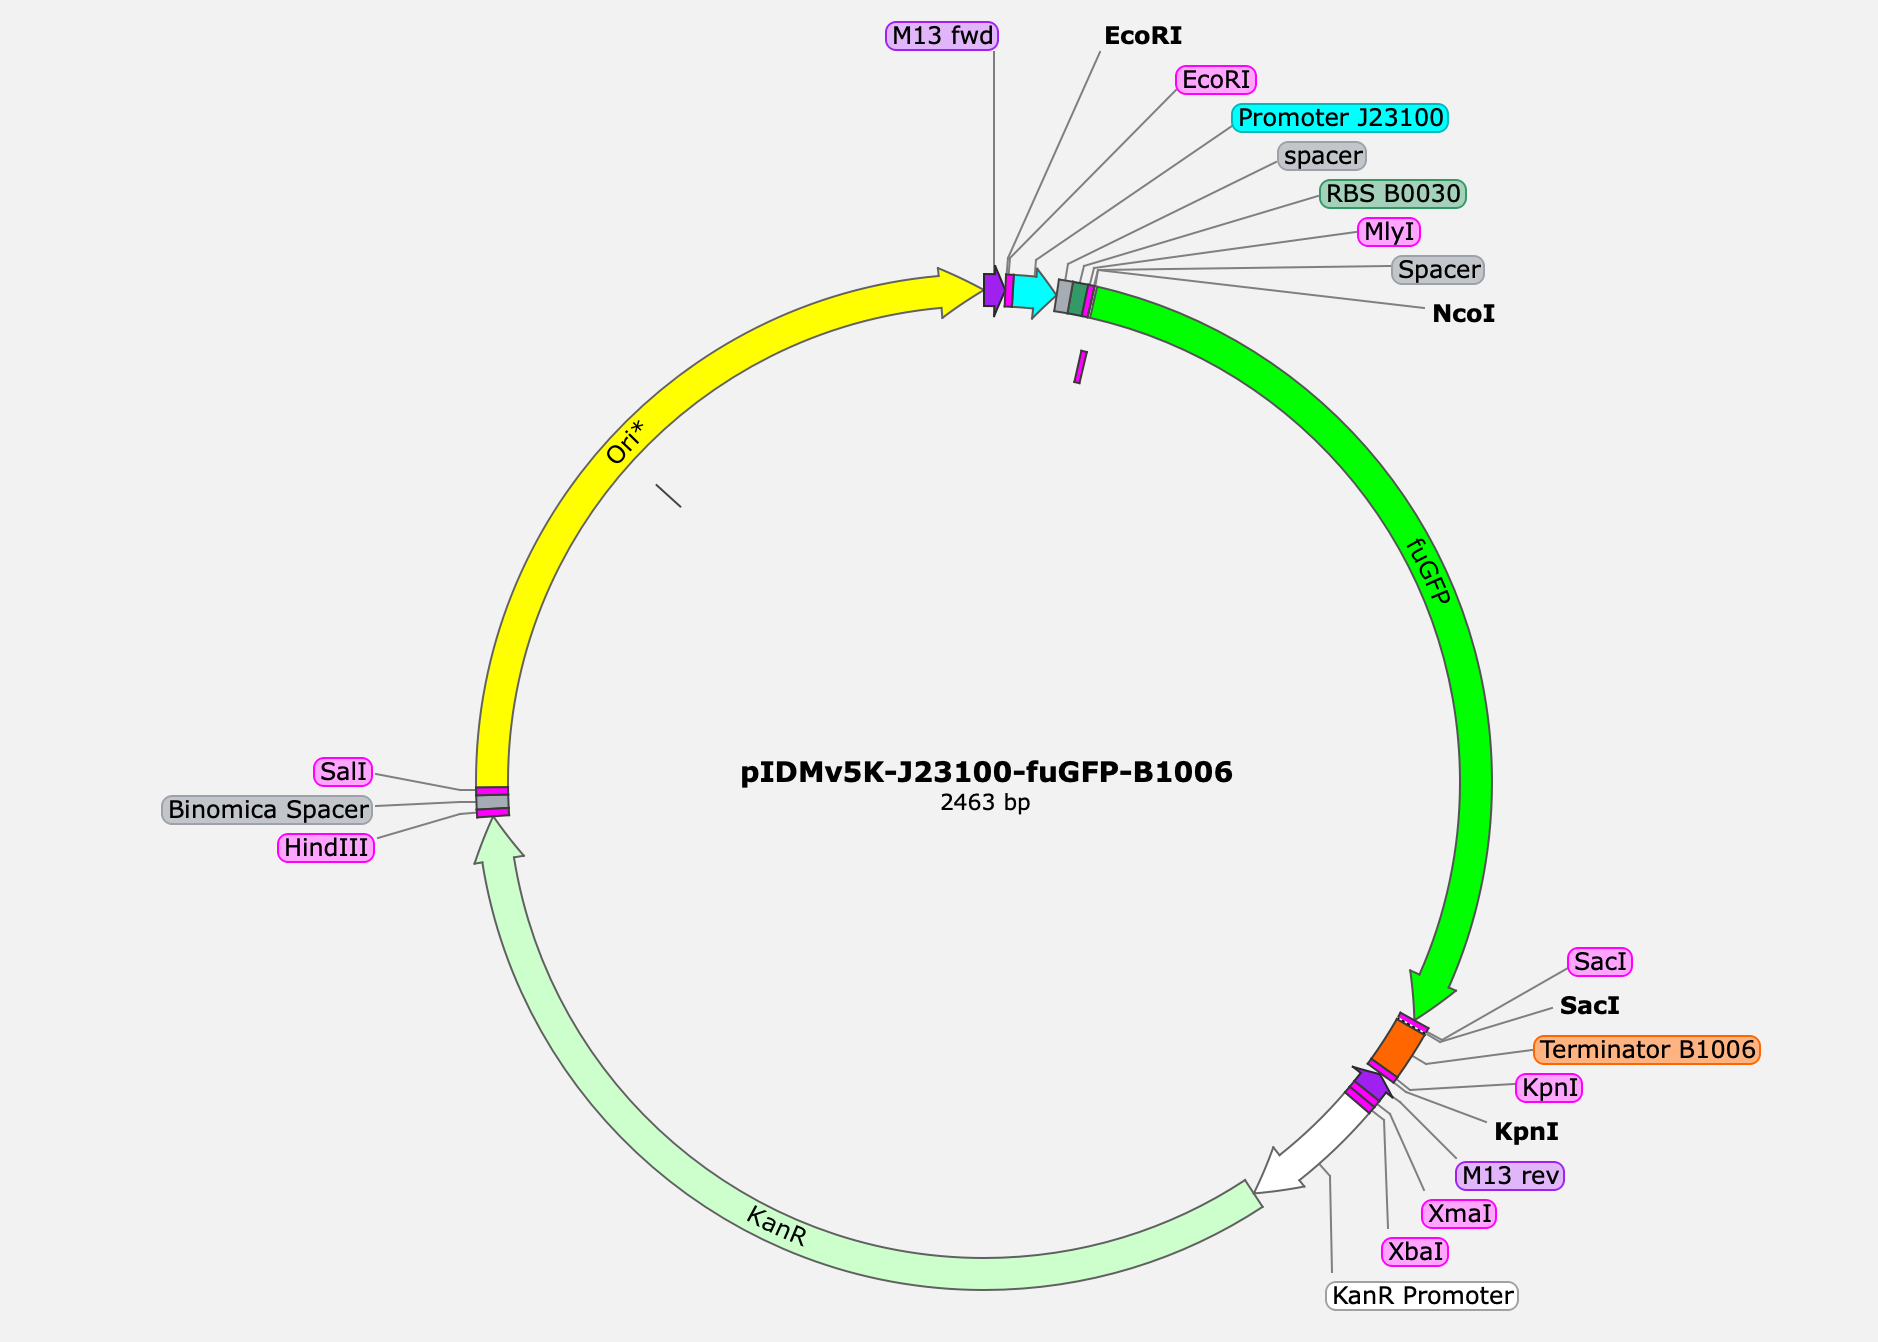


In [ ]:
sebs = """GTAAAACGACGGCCAGTGAATTCTTGACGGCTAGCTCAGTCCTAGGTACAGTGCTAGCTACTAGAGATTAAAGAGGAGAAAGAGTCCcatggtgagcagtggcgaagatattttctcgggcttggttccgattctgatcgagctggagggcgacgtgaacggtcatcgttttagcgttcgcggtgaaggttatggcgacgcgagcaacggcaaactggaaattaagttcatctgcacgaccggtcgcctgccggtgccttggccgaccttggtgacgaccttgtcgtatggcgtgcagtgttttgcgaagtatccggagcacatgcgccaaaacgatttctttaaaagtgccatgccggacggttacgtccaggagcgtaccatttccttcaaggaagatggcacgtacaaaactcgcgcagaggttaagtttgaaggtgaagcgctggtcaatcgtatcgatttgaagggtttggagtttaaagaggatggtaacattctgggccataaactggagtatagcttcaacagccattatgtttacattacggcagacaagaatcgtaacggcttggaggcccaattccgtattcgccacaatgttgatgacggtagcgtccaactggccgaccattaccaacagaacaccccaattggtgagggtccggtgttgctgccggaacaacactatctgacgaccaatagcgtgctgagcaaagatccgcaggaacgccgtgatcacatggtcctggtggaatttgtgaccgctgcgggcttgagcctgggtatggacgagctgtataagagctaataagagctCAAAAAAAAACCCCGCCCCTGACAGGGCGGGGTTTTTTTTGGTACCGTCATAGCTGTTTCCTGCCCGGGTCTAGAAAAGCCACGTTGTGTCTCAAAATCTCTGATGTTACATTGCACAAGATAAAAATATATCATCATGAACAATAAAACTGTCTGCTTACATAAACAGTAATACAAGGGGTGTTATGAGCCATATTCAACGGGAAACGTCTTGCTCGAGGCCGCGATTAAATTCCAACATGGATGCTGATTTATATGGGTATAAATGGGCTCGCGATAATGTCGGGCAATCAGGTGCGACAATCTATCGATTGTATGGGAAGCCCGATGCGCCAGAGTTGTTTCTGAAACATGGCAAAGGTAGCGTTGCCAATGATGTTACAGATGAGATGGTCAGACTAAACTGGCTGACGGAATTTATGCCTCTTCCGACCATCAAGCATTTTATCCGTACTCCTGATGATGCATGGTTACTCACCACTGCGATCCCCGGCAAAACAGCATTCCAGGTATTAGAAGAATATCCTGATTCAGGTGAAAATATTGTTGATGCGCTGGCAGTGTTCCTGCGCCGGTTGCATTCGATTCCTGTTTGTAATTGTCCTTTTAACAGCGATCGCGTATTTCGTCTGGCTCAGGCGCAATCACGAATGAATAACGGTTTGGTTGATGCGAGTGATTTTGATGACGAGCGTAATGGCTGGCCTGTTGAACAAGTCTGGAAAGAAATGCATAAGCTGTTGCCATTCTCACCGGATTCAGTCGTCACTCATGGTGATTTCTCACTTGATAACCTTATTTTTGACGAGGGGAAATTAATAGGTTGTATTGATGTTGGACGAGTGGGAATCGCAGACCGATACCAGGATCTTGCCATCCTATGGAACTGCCTCGGTGAGTTTTCTCCTTCATTACAGAAACGGCTTTTTCAAAAATATGGTATTGATAATCCTGATATGAATAAATTGCAGTTTCATTTGATGCTCGATGAGTTTTTCTAAAAGCTTtatagattacaGTCGACAGATCAAAGGATCTTCTTGAGATCCTTTTTTTCTGCGCGTAATCTGCTGCTTGCAAACAAAAAAACCACCGCTACCAGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCAAATACTGTTCTTCTAGTGTAGCCGTAGTTAGGCCACCACTTCAAGAACTCTGTAGCACCGCCTACATACCTCGCTCTGCTAATCCTGTTACCAGTGGCTGCTGCCAGTGGCGATAAGTCGTGTCTTACCGGGTTGGACCCAAGACGATAGTTACCGGATAAGGCGCAGCGGTCGGGCTGAACGGGGGGTTCGTGCACACAGCCCAGCTTGGAGCGAACGACCTACACCGAACTGAGATACCTACAGCGTGAGCTATGAGAAAGCGCCACGCTTCCCGAAGGGAGAAAGGCGGACAGGTATCCGGTAAGCGGCAGGGTCGGAACAGGAGAGCGCACGAGGGAGCTTCCAGGGGGAAACGCCTGGTATCTTTATAGTCCTGTCGGGTTTCGCCACCTCTGACTTGAGCGTCGATTTTTGTGATGCTCGTCAGGGGGGCGGAGCCTATGGAAAAACGCCAGCAACGCG""" # 2463 bp
len(sebs)

2463


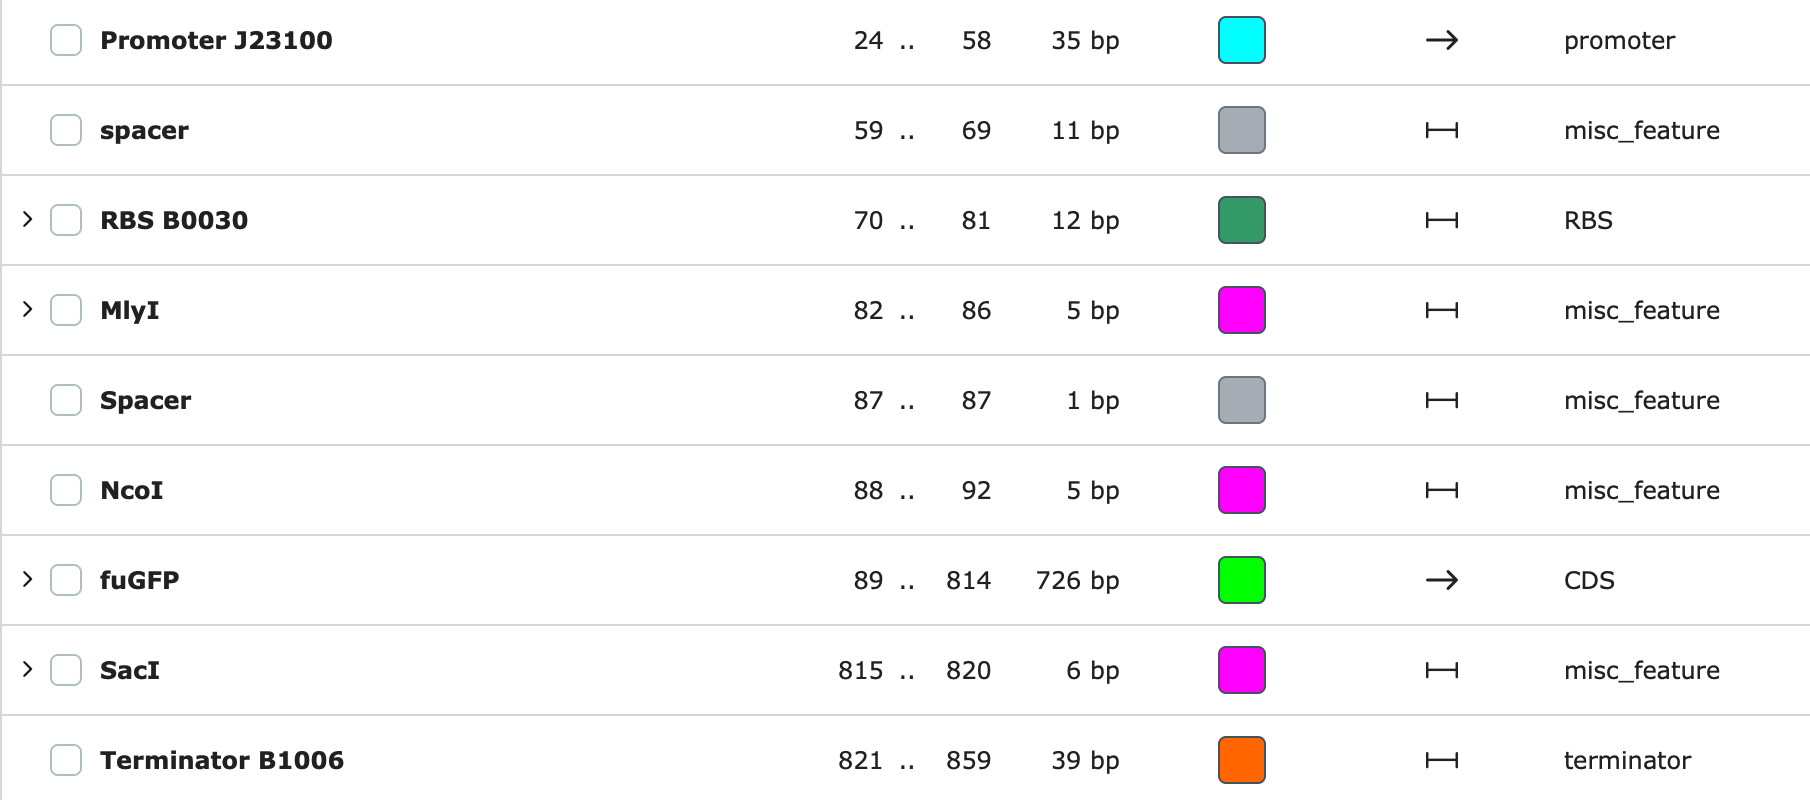


I want to take everything from the promoter to the terminator (iclusive), and replace fuGFP section with my aeBlue+linker+fwYellow.

This will give me a casette that I'll pop into GenScript's flash gene product, using their pUC57-Kan vector.

Q: Should I leave in the NcoI and SacI sites so others could cut/paste this into their own vectors? Probably...

In [ ]:
# Extract features from Seb's sequence based on the positions in the screenshot (Gah 1-indexing in snapgene!)
promoter_j23100 = sebs[23:58]  # 35 bp
spacer1 = sebs[58:69]  # 11 bp
rbs_b0030 = sebs[69:81]  # 12 bp
mlyi = sebs[81:86]  # 5 bp
spacer2 = sebs[86:87]  # 1 bp
ncoi = sebs[87:92]  # 5 bp
fugfp = sebs[88:814]  # 726 bp (the CDS we'll replace)
saci = sebs[814:820]  # 6 bp
terminator_b1006 = sebs[820:859]  # 39 bp

In [ ]:
# Check
print("Promoter J23100:", promoter_j23100)
print(f"Length: {len(promoter_j23100)} bp\n")
print("Spacer:", spacer1)
print(f"Length: {len(spacer1)} bp\n")
print("RBS B0030:", rbs_b0030)
print(f"Length: {len(rbs_b0030)} bp\n")
print("MlyI:", mlyi)
print(f"Length: {len(mlyi)} bp\n")
print("Spacer:", spacer2)
print(f"Length: {len(spacer2)} bp\n")
print("NcoI:", ncoi)
print(f"Length: {len(ncoi)} bp\n")
print("fuGFP (first 50bp):", fugfp[:50])
print(f"Length: {len(fugfp)} bp\n")
print("SacI:", saci)
print(f"Length: {len(saci)} bp\n")
print("Terminator B1006:", terminator_b1006)
print(f"Length: {len(terminator_b1006)} bp\n")

Promoter J23100: TTGACGGCTAGCTCAGTCCTAGGTACAGTGCTAGC
Length: 35 bp

Spacer: TACTAGAGATT
Length: 11 bp

RBS B0030: AAAGAGGAGAAA
Length: 12 bp

MlyI: GAGTC
Length: 5 bp

Spacer: C
Length: 1 bp

NcoI: catgg
Length: 5 bp

fuGFP (first 50bp): atggtgagcagtggcgaagatattttctcgggcttggttccgattctgat
Length: 726 bp

SacI: gagctC
Length: 6 bp

Terminator B1006: AAAAAAAAACCCCGCCCCTGACAGGGCGGGGTTTTTTTT
Length: 39 bp



In [ ]:
#aeblue_dna includes a start codon too
aeblue_dna[:6]

'ATGGCT'

In [ ]:
# Option 1:
aeblue_dna_no_stop = aeblue_dna[:-3]  # Remove the TAA stop codon
fwyellow_dna_with_stop = fwyellow_dna + 'TAA' # Add a stop codon to fwyellow_dna
fusion_dna = 'ATG' + aeblue_dna_no_stop[3:] + linker_dna + fwyellow_dna_with_stop
cassette = promoter_j23100 + spacer1 + rbs_b0030 + fusion_dna + terminator_b1006
print("Fusion DNA length:", len(fusion_dna_fixed), "bp")
print("Full cassette length:", len(cassette), "bp")
print("\nFull cassette sequence:")
print(cassette)
print("\nLast 20 bp to verify stop codon:", cassette[-20:])

Fusion DNA length: 1440 bp
Full cassette length: 1537 bp

Full cassette sequence:
TTGACGGCTAGCTCAGTCCTAGGTACAGTGCTAGCTACTAGAGATTAAAGAGGAGAAAATGGCTTCATTGGTTAAGAAGGATATGTGCATCAAGATGACCATGGAAGGGACAGTAAATGGTCACCATTTCAAGTGTGTAGGAGAAGGAGAAGGCAAGCCATTTGAAGGTACCCAGGTGGAAAAGATAAGAATCACTGAAGGTGGTCCCTTGCCATTTGCGTACGATATTTTGGCACCTTGTTGCATGTATGGAAGTAAGACCTTCATCAAGCATGTCTCAGGGATTCCAGATTACTTCAAGGAGTCTTTTCCTGAAGGCTTCACTTGGGAAAGAACCCAAATCTTCGAGGATGGAGGCTATCTCACCATTCACCAGGACACGAGCTTGCAGGGAAATAACTTCATTTTCAAGGTTAATGTCATCGGTGCCAACTTCCCTGCCAATGGTCCCGTGATGCAGAAGAAAACAGCAGGATGGGAACCATGCGTAGAGATGCTTTATCCACGTGACGGTGTCCTGTGTGGGCAGTCCTTGATGGCCCTGAAATGCACTGATGGTAACCATTTGACGAGCCATCTGCGAACTACCTACAGGTCCAGAAAGCCATCCAATGCAGTTAATATGCCAGAATTTCATTTTGGAGACCATCGCATTGAGATACTAAAGGCAGAACAAGGCAAGTTTTATGAACAGTACGAATCAGCGGTGGCCAGGTACTGTGAGGCGGCACCATCAAAGCTTGGACATCACGGAGGATCTGGTGCTGGATCTGGTGGTTCAGGAGGCATGACCGCGCTGACCGAAGGCGCGAAACTGTTTGAAAAAGAAATTCCGTATATTACCGAACTGGAAGGCGATGTGGAAGGCATGAAATTTATTATTAAAGGCGAAGGCACCGGCGATGCGAGCGTGGGCAA

In [ ]:
aeblue_dna[:-3] in cassette, fwyellow_dna in cassette, linker_dna in cassette

(True, True, True)

In [ ]:
# Aside: This is a strong promoter, a couple of sanity-check-questions to LLMs turned up a suggestion to switch it out to avoid over-burdening the cells. Here's one that is half as strong:
# Replaces J23100 (Strongest) with J23106 (Medium-High, Safe for pUC)
promoter_j23106 = "tttacggctagctcagtcctaggtatagtgctagc" 

In [ ]:
# Option 2, keeping restriction sites:

# Remove the ATG from aeBlue since NcoI provides it
aeblue_no_start_no_stop = aeblue_dna[3:-3]  # Remove ATG at start and TAA at end
fusion_with_sites = aeblue_no_start_no_stop + linker_dna + fwyellow_dna_with_stop

# Replace a few accidental NcoI sites with substitutions:
print(f"Internal NcoI sites: {fusion_with_sites.count('CCATGG')}")
print(f"Internal SacI sites: {fusion_with_sites.count('GAGCTC')}")
# Position 36-38: ACC → ACT (Thr, synonymous)
# Position 1200-1202: AAC → AAT (Asn, synonymous)
fusion_fixed = fusion_with_sites[:36] + 'ACT' + fusion_with_sites[39:1200] + 'AAT' + fusion_with_sites[1203:]
print(len(fusion_with_sites), len(fusion_fixed))
print("Substitutions:", fusion_with_sites[37:40], fusion_with_sites[1202:1205], "=>", fusion_fixed[37:40], fusion_fixed[1202:1205])
print(f"Internal NcoI sites: {fusion_fixed.count('CCATGG')}")

# Build cassette with proper restriction sites and weaker promoter
cassette_with_sites = (promoter_j23106 + spacer1 + rbs_b0030 + mlyi + spacer2 + 
                       'CCATG' + fusion_fixed + 'GAGCTC' + terminator_b1006)

Internal NcoI sites: 2
Internal SacI sites: 0
1437 1437
Substitutions: CCA CCA => CTA TCA
Internal NcoI sites: 0


NB: Why 'CCATG' not 'CCATGG' ? aeBlue starts ATG (removed) GCTTCA..., so reading from NcoI's ATG we'd get GGC as first aa (frame shift). So, I strip out one 'G'. We'll check this with back-translation.

In [ ]:
print("Cassette with restriction sites length:", len(cassette_with_sites), "bp")
print("\nAround NcoI site (should be ...RBS...CCATGG[gene]...):")
print(cassette_with_sites[60:100])
print("\nAround SacI site (should be ...[gene]...TAA...GAGCTC...terminator):")
print(cassette_with_sites[-80:-40])

# Verify the restriction sites are present
print(f"\nNcoI site (CCATGG) present: {'CCATGG' in cassette_with_sites}")
print(f"SacI site (GAGCTC) present: {'GAGCTC' in cassette_with_sites}")

# Check translation
from Bio.Seq import Seq
ncoi_pos = cassette_with_sites.find('CCATGG')
gene_for_translation = cassette_with_sites[ncoi_pos+2:ncoi_pos+32]  # ATG onwards
print(f"\nFirst 30bp from ATG: {gene_for_translation}")
print(f"Translates to: {Seq(gene_for_translation).translate()}")

Cassette with restriction sites length: 1551 bp

Around NcoI site (should be ...RBS...CCATGG[gene]...):
GTCCCCATGGCTTCATTGGTTAAGAAGGATATGTGCATCA

Around SacI site (should be ...[gene]...TAA...GAGCTC...terminator):
TGATTAAAGCGGTGGATCTGGAAACCTATCGCTAAGAGCT

NcoI site (CCATGG) present: True
SacI site (GAGCTC) present: True

First 30bp from ATG: ATGGCTTCATTGGTTAAGAAGGATATGTGC
Translates to: MASLVKKDMC


In [ ]:
# False and False due to substitutions we made, next message we check AA seq and it is right.
aeblue_dna[:-3] in cassette_with_sites, fwyellow_dna in cassette_with_sites, linker_dna in cassette_with_sites

(False, False, True)

In [ ]:
# Traslating to check AA seqs are preserved
from Bio.Seq import Seq
ncoi_pos = cassette_with_sites.find('CCATGG')
saci_pos = cassette_with_sites.find('GAGCTC')
gene_seq = cassette_with_sites[ncoi_pos+2:saci_pos]
protein = Seq(gene_seq).translate()
print(f"Gene length: {len(gene_seq)} bp")
print(f"Protein length: {len(protein)} aa")
print(f"\nFull protein sequence:\n{protein}")
aeblue_aa = aeblue.replace(" ", "")
fwyellow_aa = fwyellow.replace(" ", "")
linker_aa = "GGSGAGSGGSGG"
expected = aeblue_aa + linker_aa + fwyellow_aa + "*"
print(f"Expected protein length: {len(expected)} aa")
print(f"\naeBlue present: {aeblue_aa in str(protein)}")
print(f"Linker present: {linker_aa in str(protein)}")
print(f"fwYellow present: {fwyellow_aa in str(protein)}")
print(f"Full match: {str(protein) == expected}")

Gene length: 1440 bp
Protein length: 480 aa

Full protein sequence:
MASLVKKDMCIKMTMEGTVNGHHFKCVGEGEGKPFEGTQVEKIRITEGGPLPFAYDILAPCCMYGSKTFIKHVSGIPDYFKESFPEGFTWERTQIFEDGGYLTIHQDTSLQGNNFIFKVNVIGANFPANGPVMQKKTAGWEPCVEMLYPRDGVLCGQSLMALKCTDGNHLTSHLRTTYRSRKPSNAVNMPEFHFGDHRIEILKAEQGKFYEQYESAVARYCEAAPSKLGHHGGSGAGSGGSGGMTALTEGAKLFEKEIPYITELEGDVEGMKFIIKGEGTGDASVGKVDAQFICTTGDVPVPWSTLVTTLTYGAQCFAKYPRHIADFFKSCMPEGYVQERTITFEGDGVFKTRAEVTFENGSVYNRVKLNGQGFKKDGHVLGKNLEFNFTPHCLYIWGDQANHGLKSAFKIMHEITGSKEDFIVADHTQMNTPIGGGPVHVPEYHHITYHVTLSKDVTDHRDHLNIVEVIKAVDLETYR*
Expected protein length: 480 aa

aeBlue present: True
Linker present: True
fwYellow present: True
Full match: True


In [ ]:
print(cassette_with_sites)

TTGACGGCTAGCTCAGTCCTAGGTACAGTGCTAGCTACTAGAGATTAAAGAGGAGAAAGAGTCCCCATGGCTTCATTGGTTAAGAAGGATATGTGCATCAAGATGACTATGGAAGGGACAGTAAATGGTCACCATTTCAAGTGTGTAGGAGAAGGAGAAGGCAAGCCATTTGAAGGTACCCAGGTGGAAAAGATAAGAATCACTGAAGGTGGTCCCTTGCCATTTGCGTACGATATTTTGGCACCTTGTTGCATGTATGGAAGTAAGACCTTCATCAAGCATGTCTCAGGGATTCCAGATTACTTCAAGGAGTCTTTTCCTGAAGGCTTCACTTGGGAAAGAACCCAAATCTTCGAGGATGGAGGCTATCTCACCATTCACCAGGACACGAGCTTGCAGGGAAATAACTTCATTTTCAAGGTTAATGTCATCGGTGCCAACTTCCCTGCCAATGGTCCCGTGATGCAGAAGAAAACAGCAGGATGGGAACCATGCGTAGAGATGCTTTATCCACGTGACGGTGTCCTGTGTGGGCAGTCCTTGATGGCCCTGAAATGCACTGATGGTAACCATTTGACGAGCCATCTGCGAACTACCTACAGGTCCAGAAAGCCATCCAATGCAGTTAATATGCCAGAATTTCATTTTGGAGACCATCGCATTGAGATACTAAAGGCAGAACAAGGCAAGTTTTATGAACAGTACGAATCAGCGGTGGCCAGGTACTGTGAGGCGGCACCATCAAAGCTTGGACATCACGGAGGATCTGGTGCTGGATCTGGTGGTTCAGGAGGCATGACCGCGCTGACCGAAGGCGCGAAACTGTTTGAAAAAGAAATTCCGTATATTACCGAACTGGAAGGCGATGTGGAAGGCATGAAATTTATTATTAAAGGCGAAGGCACCGGCGATGCGAGCGTGGGCAAAGTGGATGCGCAGTTTATTTGCACCACCGGCGATGTGCCGGTGCCGTGGAGCACCCTGGTGACCACCCTGACCT

OK, final checks all look good, multiple AIs hace signed off, the one remaining worry is the codon optimization. GenScript offers this but TBH I want this to be MY protein haha. Maybe I'll do an optimized version with M's new toys and compare. 

In [ ]:
fwyellow_dna_with_stop[:6]

'ATGACC'

Is it OK that there's an ATG at the start of this? Yes - although I had a moment of panic, before I remembered that it doesn't just mean 'start' abstractly, it's methionine and most proteins start with that but also have it elsewhere and it's totaly fine in its place there.

OK, less than 24 hours from starting this thought to having a plsmid, and that includes sleep, making eggs benedict for people, and an afternoon hiking. Maybe 5-6 hours of work?